In [ ]:
#What should I charge?

In [13]:
import requests
import pandas as pd
import sqlite3 as lite
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline

In [17]:
df = pd.read_csv('dog-vacay.csv', sep='\t')

In [20]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [21]:
df.head()

,city,fee,names,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
0,"Phoenix, Arizona",35,"[u'Big', u'Backyard', u'in', u'Central', u'Pho...",5,8,1,26,2,1,0,1,0,0,0,0,0,0
1,"Phoenix, Arizona",35,"[u'SUZY', u'Q', u'to', u'the', u'Rescue']",5,16,2,30,3,1,0,0,1,0,0,0,0,1
2,"Phoenix, Arizona",35,"[u'24/7', u'Dog', u'boarding']",0,0,1,0,4,1,0,1,1,1,0,0,0,0
3,"Phoenix, Arizona",38,[u'Messy4dogs@gmail.com'],5,2,3,3,4,1,0,1,1,1,0,0,0,0
4,"Phoenix, Arizona",25,"[u'Pet', u'Paradise']",5,1,1,5,4,1,0,0,1,1,1,0,0,0


In [22]:
#Start by looking at the average
df.describe()

,fee,ratings,repeat,response_time,review,services,boarding,sitting,daycare,checkups,walking,bathing,training,grooming,pickup/dropoff
count,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.000000,4662.00000,4662.000000
mean,38.678464,3.416345,4.817889,1.582154,9.806521,3.162377,0.947662,0.349206,0.637066,0.431145,0.403904,0.154011,0.028529,0.01094,0.199914
std,11.184772,2.308807,9.537766,0.767003,19.448652,1.062929,0.222732,0.476770,0.480898,0.495289,0.490731,0.360998,0.166495,0.10403,0.399979
min,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,30.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,38.000000,5.000000,1.000000,1.000000,3.000000,4.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,45.000000,5.000000,5.000000,2.000000,10.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
max,95.000000,5.000000,98.000000,3.000000,370.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


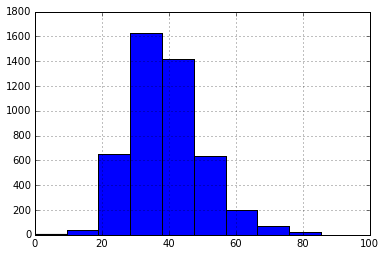

In [5]:
#Histogram of fees
p = df['fee'].hist()
plt.show()